In [ ]:
pre_process

In [ ]:
训练集B
数据的shape和分布，都和训练集A高度一致。

In [ ]:
处理到分离数据集之前的全部前期工作
数据集基本信息观察 + 融合table123

In [1]:
import numpy as np
import pandas as pd

### 原始txt处理，并转成csv

In [ ]:
读取原始数据集(txt)形式，并转换得到count特征，存储为csv形式

In [2]:
user_register_log = pd.read_csv('dataset_B/user_register_log.txt',header = None , sep = '\t')
app_launch_log = pd.read_csv('dataset_B/app_launch_log.txt',header = None,sep = '\t')
video_create_log = pd.read_csv('dataset_B/video_create_log.txt',header = None , sep = '\t')
user_activity_log = pd.read_csv('dataset_B/user_activity_log.txt',header = None , sep = '\t')

In [ ]:
不需要转换得到count的table，只需要给出列名就行

In [ ]:
user_register_log的情况同数据集A时，没有什么问题。

In [4]:
user_register_log.columns = ['user_id','register_day','register_type','device_type']

In [9]:
user_register_log.head()

,user_id,register_day,register_type,device_type
0,167777,1,4,270
1,886972,1,0,5
2,921231,1,0,0
3,904908,1,1,49
4,460291,2,0,72


In [6]:
user_register_log.shape

(51480, 4)

In [ ]:
app_launch_log也如同数据集A

In [14]:
app_launch_log.columns = ['user_id','app_launch_day']

In [15]:
app_launch_log.head()

,user_id,app_launch_day
0,1287915,3
1,1287915,4
2,1287915,8
3,1287915,14
4,1287915,15


In [16]:
app_launch_log.shape

(252496, 2)

In [ ]:
需要转换count的table的处理

In [ ]:
video_create_log没有问题

In [ ]:
先排好序

In [19]:
video_create_log.columns = ['user_id','video_create_day']

In [21]:
video_create_log.sort_values(['user_id','video_create_day'],inplace = True)

In [23]:
video_create_log = video_create_log.reset_index()

In [25]:
del video_create_log['index']

In [27]:
video_create_log['count'] = 1

In [33]:
video_create_log.head()

,user_id,video_create_day,video_create_day_count
0,885,23,1
1,979,20,1
2,1119,27,5
3,1370,26,4
4,1607,10,1


In [ ]:
计数count
——突然发现或许可以用groupby的方式：user_id和video_create_day都当做group的index，然后count就行了

In [29]:
temp_list = video_create_log.duplicated() # 用于指导计数
temp_list2 = video_create_log['count']
count_temp = 1
for i in range(video_create_log.shape[0]):
# for i in range(len(temp_list2)):
    temp = temp_list[i]
    if temp == False:
        count_temp = 1
    else:
        count_temp = count_temp + 1
        # print(count_temp)
        temp_list2[i] = count_temp 
        # print(temp_list2[i])

In [30]:
video_create_log.drop_duplicates(subset = ['user_id','video_create_day'],keep = 'last',inplace = True)
video_create_log.columns = ['user_id','video_create_day','video_create_day_count']

In [32]:
video_create_log = video_create_log.reset_index()
del video_create_log['index']

In [34]:
video_create_log.shape

(17271, 3)

In [ ]:
另一个table如法炮制

In [36]:
user_activity_log.columns = ['user_id','activity_day','activity_page','video_id','author_id','action_type']

In [39]:
user_activity_log.shape

(21072403, 6)

In [40]:
user_activity_log.sort_values(['user_id','activity_day'],inplace = True)
user_activity_log = user_activity_log.reset_index()
del user_activity_log['index']

In [ ]:
处理方式和上边有些不同（因为这个table比较大），而且其实这种方法更合理。
——必须另外new一个list，而不是像上边那种，通过赋值将list复制过去！赋值过去的其实两个list是同一块内存地址，并不合适！

In [41]:
temp_list = user_activity_log.duplicated() # 用于指导计数
count_temp = 1
list_temp = np.ones(shape = user_activity_log.shape[0],dtype = np.uint8 )

In [42]:
for i in range(user_activity_log.shape[0]):
# for i in range(len(temp_list2)):
    temp = temp_list[i]
    if temp == False:
        count_temp = 1
    else:
        count_temp = count_temp + 1
        # print(count_temp)
        list_temp[i] = count_temp 
        # print(temp_list2[i])

In [43]:
user_activity_log['activity_count'] = list_temp

In [44]:
user_activity_log.drop_duplicates(subset = ['user_id','activity_day','activity_page',
                                          'video_id','author_id','action_type'],keep = 'last',inplace = True)
user_activity_log = user_activity_log.reset_index()
del user_activity_log['index']

In [45]:
user_activity_log.shape

(17635062, 7)

In [46]:
user_activity_log.head()

,user_id,activity_day,activity_page,video_id,author_id,action_type,activity_count
0,8,9,3,1955966,309219,0,2
1,8,9,0,1340816,12378,0,1
2,8,9,0,3488372,107008,0,1
3,8,9,0,1705402,37639,0,2
4,8,9,0,3710937,1312718,0,1


In [ ]:
存储结果

In [47]:
user_register_log.to_csv('dataset_B/user_register_log.csv',index = False)
app_launch_log.to_csv('dataset_B/app_launch_log.csv',index = False)
video_create_log.to_csv('dataset_B/video_create_log.csv',index = False)
user_activity_log.to_csv('dataset_B/user_activity_log.csv',index = False)

### 将前3个table合并

In [ ]:
读取处理好的结果，作为后续的原始结果

In [2]:
user_register_log = pd.read_csv('dataset_B/user_register_log.csv')
app_launch_log = pd.read_csv('dataset_B/app_launch_log.csv')
video_create_log = pd.read_csv('dataset_B/video_create_log.csv')
user_activity_log = pd.read_csv('dataset_B/user_activity_log.csv')

In [3]:
user_activity_log.head()

,user_id,activity_day,activity_page,video_id,author_id,action_type,activity_count
0,8,9,3,1955966,309219,0,2
1,8,9,0,1340816,12378,0,1
2,8,9,0,3488372,107008,0,1
3,8,9,0,1705402,37639,0,2
4,8,9,0,3710937,1312718,0,1


In [8]:
user_activity_log.groupby(['activity_day','action_type'])['activity_count'].sum()

activity_day  action_type
1             0                65714
              1                 2656
              2                 1122
              3                  353
              5                    3
2             0               122748
              1                 3894
              2                 1938
              3                  503
              5                    4
3             0               156394
              1                 5062
              2                 2036
              3                  511
              4                    1
              5                   31
4             0               190002
              1                 5585
              2                 2156
              3                  639
              4                    1
              5                    7
5             0               234055
              1                 6698
              2                 3120
              3                  950
            

In [4]:
user_activity_log['activity_page'].value_counts()

0    8300322
3    6809315
1    1381398
2    1064344
4      79683
Name: activity_page, dtype: int64

In [6]:
user_activity_log['action_type'].value_counts()

0    16869873
1      537607
2      185055
3       40809
5        1594
4         124
Name: action_type, dtype: int64

In [49]:
temp1 = pd.merge(user_register_log,app_launch_log,how = 'outer')
temp1 = temp1.sort_values(ascending = True,by = ['user_id','register_day','app_launch_day'])

In [50]:
user_register_log.shape,app_launch_log.shape,temp1.shape

((51480, 4), (252496, 2), (252496, 5))

In [53]:
temp1.isnull().sum()

user_id           0
register_day      0
register_type     0
device_type       0
app_launch_day    0
dtype: int64

In [ ]:
注意这个merge，必须要让两个day保持是同一天，因此和user_id一样，要作为两个table的连接列。

In [51]:
temp2 = pd.merge(temp1,video_create_log,how = 'outer',left_on = ['user_id','app_launch_day'],
         right_on = ['user_id','video_create_day'])
temp2 = temp2.sort_values(ascending = True,by = ['user_id','register_day','app_launch_day','video_create_day'])

In [52]:
temp2.shape

(252516, 7)

In [ ]:
确定缺失值情况，如果注册table有缺失，则必须填补

In [56]:
temp2.isnull().sum()

user_id                        0
register_day                  20
register_type                 20
device_type                   20
app_launch_day                20
video_create_day          235245
video_create_day_count    235245
dtype: int64

In [ ]:
先观察缺失数据的情况
——看了下边的分析就知道了。登录日期是24号，创建视频的时间是25号。
因此登录与否和创建视频与否没有同步。造成了这个问题。
本身认为创建视频一定会登陆这个也是没问题的（基于这个逻辑merge的），是数据自己本身的问题。

In [62]:
user_id = app_launch_log['user_id']
app_launch_log[user_id == 44938]

,user_id,app_launch_day
74892,44938,24


In [63]:
user_id = user_register_log['user_id']
user_register_log[user_id == 44938]

,user_id,register_day,register_type,device_type
46342,44938,24,2,2759


In [64]:
user_id = video_create_log['user_id']
video_create_log[user_id == 44938]

,user_id,video_create_day,video_create_day_count
532,44938,25,2


In [57]:
temp2_reg_null = temp2[temp2['register_day'].isnull()]
temp2_reg_null

,user_id,register_day,register_type,device_type,app_launch_day,video_create_day,video_create_day_count
252496,44938,NaN,NaN,NaN,NaN,25.0,2.0
252497,150848,NaN,NaN,NaN,NaN,19.0,1.0
252498,180863,NaN,NaN,NaN,NaN,15.0,1.0
252499,184543,NaN,NaN,NaN,NaN,24.0,3.0
252500,212676,NaN,NaN,NaN,NaN,23.0,3.0
252501,255924,NaN,NaN,NaN,NaN,30.0,1.0
252502,431351,NaN,NaN,NaN,NaN,26.0,1.0
252503,454157,NaN,NaN,NaN,NaN,15.0,1.0
252504,514730,NaN,NaN,NaN,NaN,13.0,1.0
252505,566846,NaN,NaN,NaN,NaN,22.0,2.0


In [ ]:
用复制的方法填补这些不该出现的nan
——利用其它table移动过来这些值

In [65]:
temp2_reg_null['app_launch_day'] = temp2_reg_null['video_create_day']

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
将这个子table的结果覆盖回原表格temp2中（特定区域覆盖）

In [66]:
temp2[temp2['register_day'].isnull()] = temp2_reg_null

In [70]:
temp2.isnull().sum()

user_id                        0
register_day                  20
register_type                 20
device_type                   20
app_launch_day                 0
video_create_day          235245
video_create_day_count    235245
dtype: int64

In [ ]:
继续其他列

In [ ]:
由于这些id在temp2和注册table中的index已经不同，因此没办法直接从注册table中提取到信息
因此需要先提取出这些user在注册table中的index

In [71]:
user_id = temp2_reg_null['user_id']
user_id2 = user_register_log['user_id']

In [72]:
temp = []
for item in user_id:
    temp.append(user_id2[user_id2 == item].index.values[0])

In [ ]:
根据index获得对应的注册信息

In [73]:
table_temp = user_register_log.loc[temp,:]
table_temp = table_temp.reset_index()
del table_temp['index']

In [ ]:
此时index仍然是注册table的，要变成temp2这个table的index！之后才能覆盖

In [74]:
table_temp.index = temp2_reg_null.index

In [ ]:
内容覆盖

In [75]:
temp2_reg_null['register_day'] = table_temp['register_day']
temp2_reg_null['register_type'] = table_temp['register_type']
temp2_reg_null['device_type'] = table_temp['device_type']

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [76]:
temp2[temp2['register_day'].isnull()] = temp2_reg_null

In [77]:
temp2.isnull().sum()

user_id                        0
register_day                   0
register_type                  0
device_type                    0
app_launch_day                 0
video_create_day          235245
video_create_day_count    235245
dtype: int64

In [78]:
temp2_reg_null

,user_id,register_day,register_type,device_type,app_launch_day,video_create_day,video_create_day_count
252496,44938,24,2,2759,25.0,25.0,2.0
252497,150848,18,2,3473,19.0,19.0,1.0
252498,180863,6,2,41203,15.0,15.0,1.0
252499,184543,23,2,2923,24.0,24.0,3.0
252500,212676,22,2,3108,23.0,23.0,3.0
252501,255924,29,2,3239,30.0,30.0,1.0
252502,431351,25,2,3016,26.0,26.0,1.0
252503,454157,14,2,3140,15.0,15.0,1.0
252504,514730,12,2,3468,13.0,13.0,1.0
252505,566846,21,2,128,22.0,22.0,2.0


In [ ]:
完成，存档

In [79]:
temp2.to_csv('dataset_B_for_model_method/origin_dataset/table_merge_first_3.csv',index = False)

### 分析table随时间的趋势，观察如何划分数据集

In [ ]:
先抛出重要结论：
数据集A该怎么划分，数据集B就怎么划分得了

In [87]:
user_register_log = pd.read_csv('dataset_B/user_register_log.csv')
app_launch_log = pd.read_csv('dataset_B/app_launch_log.csv')
video_create_log = pd.read_csv('dataset_B/video_create_log.csv')
user_activity_log = pd.read_csv('dataset_B/user_activity_log.csv')

In [88]:
user_register_log.shape

(51480, 4)

In [89]:
register_count = user_register_log['register_day'].value_counts()

In [90]:
register_count = register_count.sort_index(ascending = True)

In [91]:
register_count.values

array([1229, 1142, 1209, 1134, 1368, 1844, 1723, 1218, 1104, 1389, 1377,
       1748, 2214, 2102, 1581, 1541, 1483, 1506, 1543, 1780, 2450, 2384,
       2266, 2979, 1582, 1711, 2195, 2107, 1812, 1759], dtype=int64)

In [ ]:
反正看着趋势真的和数据集A没区别啊

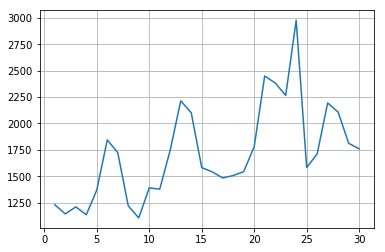

In [85]:
import matplotlib.pyplot as plt
x = list(register_count.index)
y = register_count.values
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
观察突发注册时间段：
高发注册区间
6,7——13,14——21,22，23，24——27,28
如果6,7是周末，那么：20,21是周末，只是因为某些缘故让后边几天注册人数变多了（比如活动）
——得出结论：31-37是周三到下周三。
因此数据集的分割根据这个信息——
1-16 17-23：17是周三——14+3
8-23 24-30：21+3 = 24也是周三
15-30 31-37

In [93]:
launch_count = app_launch_log['app_launch_day'].value_counts()
launch_count.sort_index(ascending = True,inplace = True)

In [ ]:
数据集B的趋势

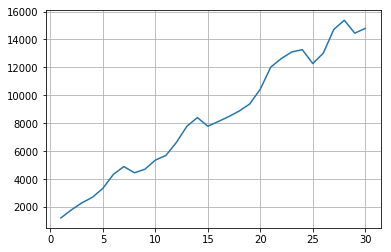

In [94]:
import matplotlib.pyplot as plt
x = list(launch_count.index)
y = launch_count.values
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
数据集A的趋势

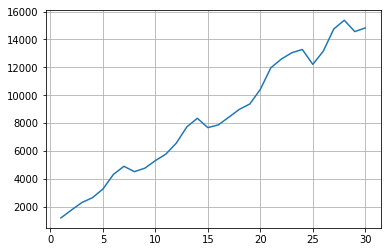

In [17]:
import matplotlib.pyplot as plt
x = list(launch_count.index)
y = launch_count.values
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
登录count也在每个周末也一个小幅度的爬升↑
6,7——13,14——27,28

In [95]:
video_create_log.head()

,user_id,video_create_day,video_create_day_count
0,885,23,1
1,979,20,1
2,1119,27,5
3,1370,26,4
4,1607,10,1


In [96]:
video_count = video_create_log['video_create_day'].value_counts()
video_count.sort_index(ascending = True,inplace = True)

In [ ]:
数据集B的趋势，因为video这个相对少，所以趋势会有一点变化，但是整体没问题，和数据集A完全一致

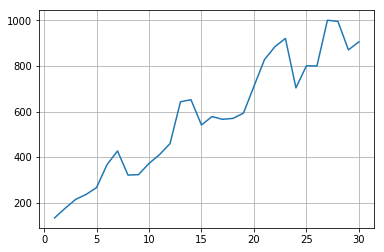

In [97]:
import matplotlib.pyplot as plt
x = list(video_count.index)
y = video_count.values
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
数据集A

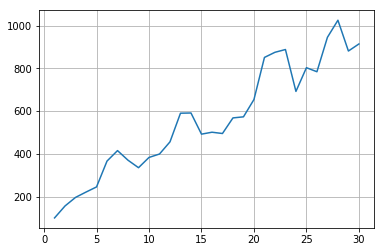

In [20]:
import matplotlib.pyplot as plt
x = list(video_count.index)
y = video_count.values
plt.plot(x,y)
plt.grid()
plt.show()

In [98]:
user_activity_log.head()

,user_id,activity_day,activity_page,video_id,author_id,action_type,activity_count
0,8,9,3,1955966,309219,0,2
1,8,9,0,1340816,12378,0,1
2,8,9,0,3488372,107008,0,1
3,8,9,0,1705402,37639,0,2
4,8,9,0,3710937,1312718,0,1


In [99]:
act_count = user_activity_log['activity_day'].value_counts()
act_count.sort_index(ascending = True,inplace = True)

In [ ]:
数据集B

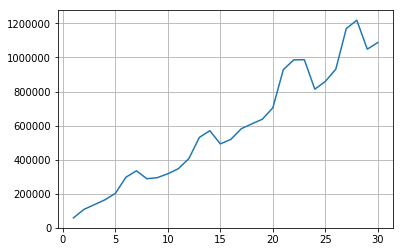

In [100]:
import matplotlib.pyplot as plt
x = list(act_count.index)
y = act_count.values
plt.plot(x,y)
plt.grid()
plt.show()

In [ ]:
数据集A

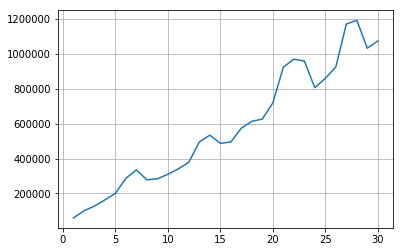

In [23]:
import matplotlib.pyplot as plt
x = list(act_count.index)
y = act_count.values
plt.plot(x,y)
plt.grid()
plt.show()

### 提交所有注册用户，用于计算真实活跃用户的个数

In [ ]:
目的：是为了之后使用xgb时，确定0-1分割的阈值时使用。大概多少比较靠近这个【真实活跃用户个数】。
testA数值是23700+，0.4的阈值时24400-24500，就差不多。

In [ ]:
testB的数值计算结果：
0.630887
51480 × (0.630887 / 2 - 0.630887) = 23722（和23726相比基本上没有区别！）

In [ ]:
计算方式说明：
https://www.kesci.com/apps/home/competition/forum/5b1a32fbfe8bc06aa3aab6bb
    和文档《通过F1值确定活跃用户的个数+获得算法准确和召回的具体情况》

In [24]:
user_register_log = pd.read_csv('dataset/user_register_log.csv')

In [10]:
user = user_register_log[['user_id']]

In [11]:
user.shape

(51480, 1)

In [12]:
user.head()

,user_id
0,167777
1,886972
2,921231
3,904908
4,460291


In [ ]:
提交结果

In [13]:
user.to_csv('all_user_testB.csv',index = False, header = False) # 基本调参后的结果